# Pendahuluan
“Aksara, coba ikut saya ke ruangan rapat sebentar. Ada yang mau saya tunjukkan,” pinta Andra.

Baru kali ini Andra mengajakku ke ruang rapat. Biasanya aku hanya mendengar ia mau rapat, dan sering kali ia sendiri juga yang menghampiriku. Aku pun segera beranjak. Ini pasti berkaitan dengan proyek yang dijanjikannya. Sesampaiku di ruang rapat, laptop Andra sudah terbuka dan menampilkan pantulan layar berupa data angka-angka. 


“Begini, Aksara. Perusahaan kita lagi butuh perbandingan performa dari setiap cabang di berbagai kota. Nanti ambil saja lima kota terbesar di Pulau Jawa untuk dianalisis dari segi order size, customer count, product count, brand count, dan GMV dalam basis bulanan. Sampai sini apakah cukup paham?”


Sebenarnya aku cukup paham, tapi untuk memastikannya aku pun bertanya, “Jadi, ini aku perlu pivot ya untuk setiap measure yang dibutuhkan, lalu mencari angkanya per bulan?”


“Benar. Sebelum saya beri deadline, dari kamu bisa selesai kapan?” tawar Andra. 


“Hmmm, datanya sendiri sudah bersih atau perlu aku cleaning lagi, Ndra?” tanyaku sembari menimbang-nimbang. 


“Datanya sudah bersih. Nanti akan coba saya kirimkan yang versi lengkapnya dalam tahun 2019 agar bisa kamu pertimbangkan estimasi waktu pengerjaan.”


“Oke, Ndra. Soalnya, kalau datanya sudah bersih, dua hari cukup sih. Tapi aku cek dulu deh data lengkap yang nanti dikirim.”


“Selamat bekerja, Aksara.”

# Performa Penjualan di Setiap Cabang - Part 1
Diberikan 4 csv files yang isinya retail data untuk tiap quarter:

csv (data dari bulan January - March)       --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv

csv (data dari bulan April - June)              --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv

csv (data dari bulan July - September)      --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv

csv (data dari bulan October - December)  --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv
 

Goal: Automation untuk pembuatan grafik dari measurement yang dibutuhkan.

 

Untuk part 1 ini yang perlu dilakukan:

[1]. Load masing-masing data *.csv dengan Pandas

[2]. Pengecekan dan Transformasi Data 

Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
Jika sama digabungkan.
Cek informasi dataframe yang telah digabungkan
Statistik deskriptif dari dataframe yang telah digabungkan.
Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv")
retail_data3 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv")
retail_data4 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv")

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

PENGECEKAN DATA


   order_id order_date  customer_id       city     province product_id  \
0   1612885   01-01-19        16293     Malang   Jawa Timur      P1301   
1   1612387   01-01-19        17228      Bogor   Jawa Barat      P2086   
2   1612903   01-01-19        16775  Surakarta  Jawa Tengah      P1656   
3   1612963   01-01-19            0    unknown      unknown      P3127   
4   1612915   01-01-19            0    unknown      unknown      P1230   

     brand  quantity  item_price  total_price  
0  BRAND_F         6      747000      4482000  
1  BRAND_L         4      590000      2360000  
2  BRAND_G         3     1325000      3975000  
3  BRAND_S         1     1045000      1045000  
4  BRAND_E         1     -891000       891000  
Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data2: Index(['order_id', 'order_date', 'customer_id',

# Performa Penjualan di setiap Cabang - Part 2
Melanjutkan penyelesaian persoalan ke langkah berikutnya.

[3] Transformasi Data 

Jika ada data yang tidak seharusnya maka dapat dibuang
Jika ada kolom yang seharusnya bertipe datetime64 ubahlah
Cek kembali informasi dataframe 
Tampilkan kembali statistik deskriptif dari dataframe
Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

 

Sebagai kontrol, informasi terakhir (baris 32) berikut dengan statistik deskriptif (baris 34) adalah:
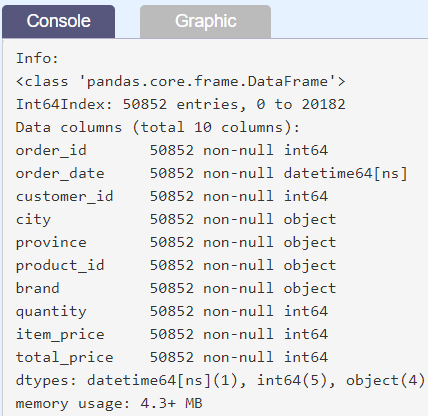

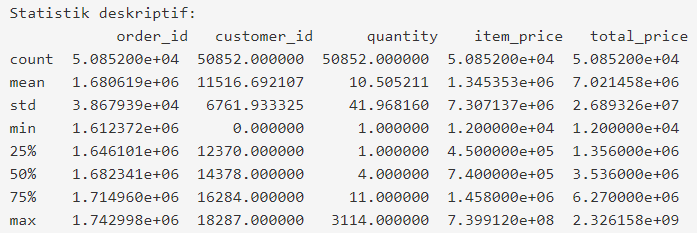


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
    order_id order_date  customer_id           city     province product_id  \
4   1612915   01-01-19            0        unknown      unknown      P1230   
96  1612927   01-01-19            0        unknown      unknown      P2736   
21  1697299   01-10-19        17841  Jakarta Utara  DKI Jakarta      P2482   

      brand  quantity  item_price  total_price  
4   BRAND_E         1     -891000       891000  
96  BRAND_P         1     -891000      -891000  
21  BRAND_P         1      520000      -520000  

order_id yang bernilai undefined:
     order_id order_date  customer_id           city     province product_id  \
9  undefined   01-07-19        15150  Jakarta Pusat  DKI Jakarta      P3694   

     brand  quantity  item_price  total_price  
9  BRAND_T        12      159000      1908000  

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50852 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Nul

# Performa Penjualan di setiap Cabang - Part 3
Mari lanjutkan ke langkah berikutnya.

[4]. Filter province yang hanya termasuk 5 provinsi besar di Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta)

[5]. Mengelompokkan data berdasarkan order_date dan province yang sudah di filter dan menghitung order unique count, customer unique count, product unique count, brand unique count, dan GMV (Gross Merchandise Volume = total_price untuk semua penjualan)

[6]. Melakukan unstack untuk mendapatkan order_date di bagian baris dan province di bagian column

 

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

 

Sebagai kontrol, bahwa output langkah ke [5]
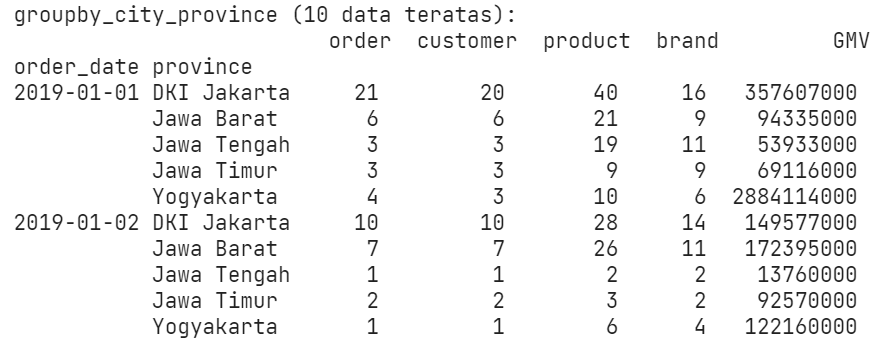

dan output langkah [6] 

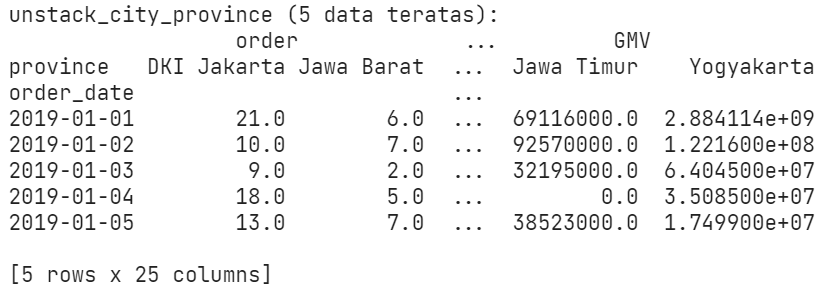


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['Jawa Timur' 'Jawa Barat' 'Jawa Tengah' 'Yogyakarta' 'DKI Jakarta']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
2019-01-02 DKI Jakarta     10        10       28     14   149577000
           Jawa Barat       7         7       26     11   172395000
           Jawa Tengah      1         1        2      2    13760000
           Jawa Timur       2         2        3      2    92570000
           Yogyakarta       1         1        6      4   122160000

unstack_city_province (5 dat

# Performa Penjualan di setiap Cabang - Part 4
Ayo lanjutkan ke langkah berikutnya:

[7]. Slicing data untuk masing-masing measurement (kolom), misal: kolom order

[8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan secara bulanan

 

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())

# Performa Penjualan di setiap Cabang - Part 5
Sekarang dilanjutkan untuk langkah #[9] yaitu menampilkan grafik dari langkah #[8] yang telah dilakukan.

[9]. Plot untuk hasil pada langkah #[8]

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

 

Output untuk langkah [9]
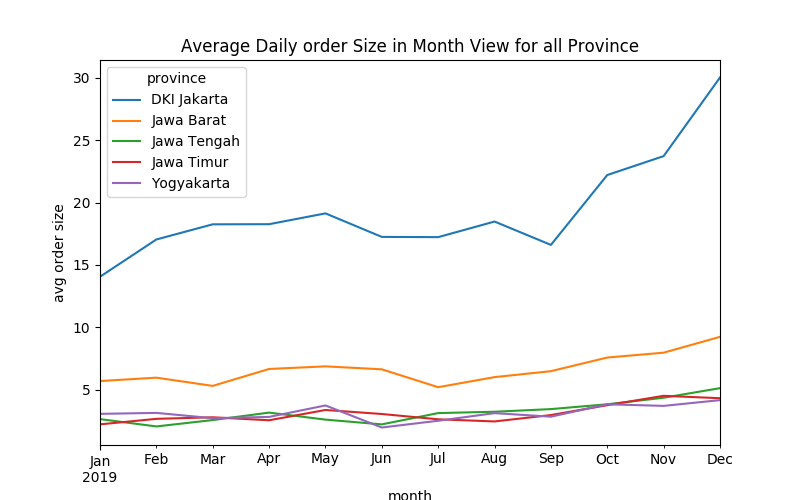

Dapat dilihat bahwa avg order size untuk DKI Jakarta tertinggi dan terus memiliki kenaikan, disusul oleh Jawa Barat dan kemudian 3 sisanya hampir berada dalam angka yang rata-rata sama

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
by_order_monthly_mean = by_order.resample('M').mean()

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

# Performa Penjualan di setiap Cabang - Part 6
Langkah 7 s/d 9 yang telah dilakukan baru untuk satu measurement yaitu order. Berarti ada empat kali lagi kode seperti ini harus dibuat. Karena struktur code masih sama, dapat menggunakan perulangan sesuai dengan jumlah measurement yaitu 5, sehingga kelima measurement dapat ditampilkan grafiknya dalam satu canvas figure.

Mari memulai dengan membuat sebuah perulangan dengan dataframe unstack_city_province yang digunakan (hasil dari langkah ke 5 di part 2).

 

Visualisasi yang diharapkan adalah:
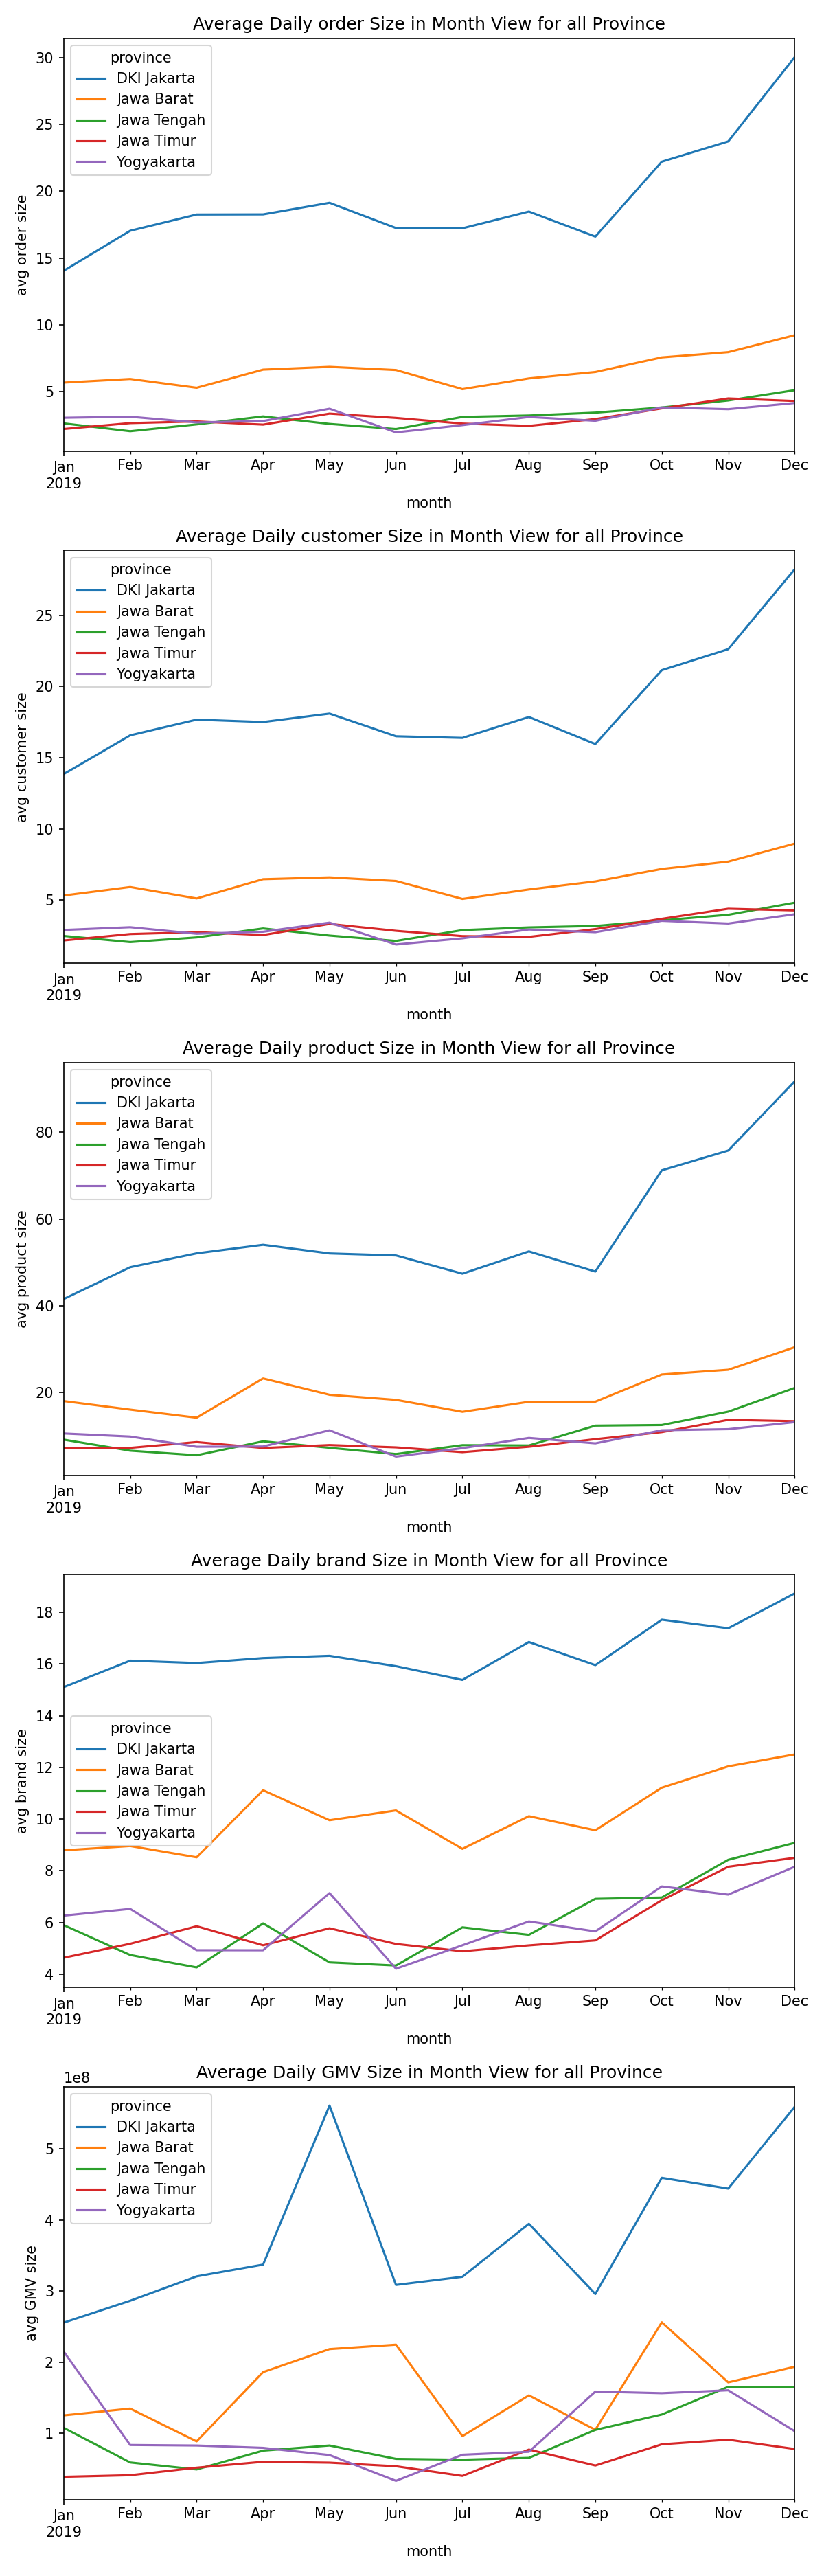

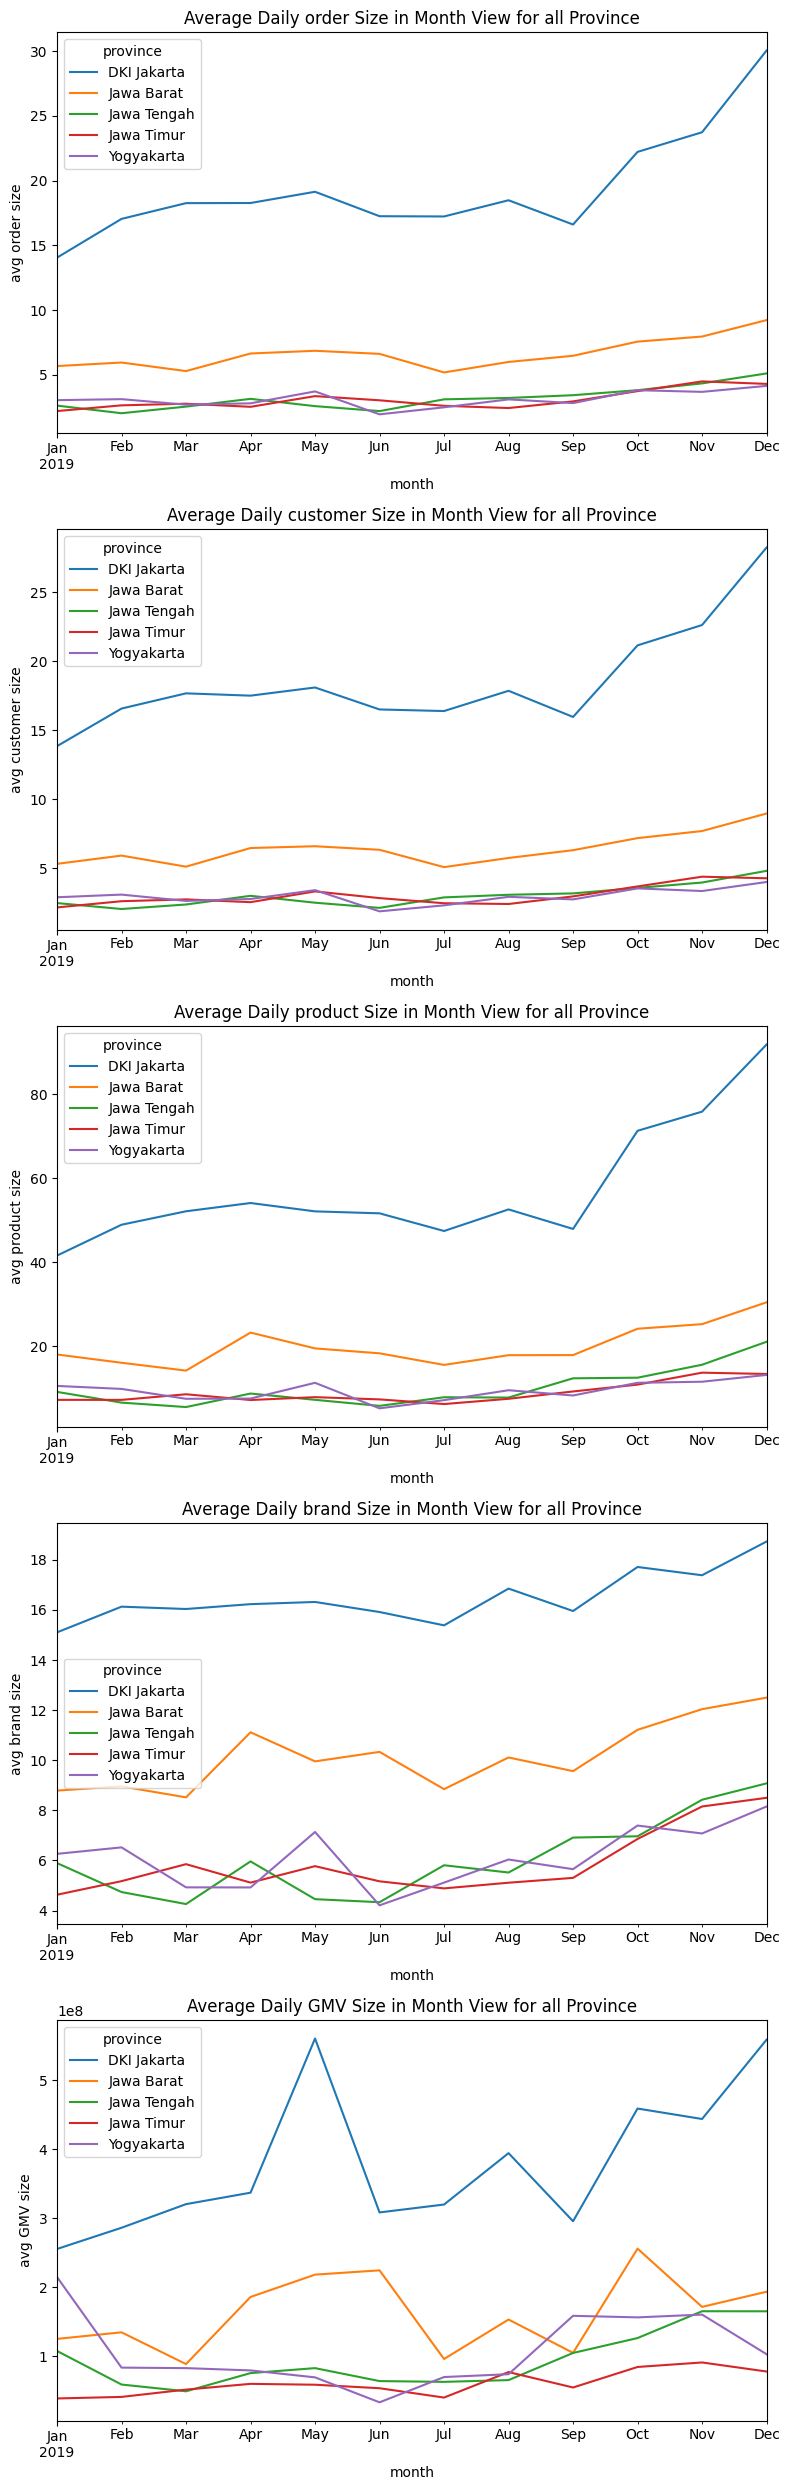

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])

cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

cek = retail_table.loc[retail_table['order_id'] == 'undefined']
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]

groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
groupby_city_province.columns = ['order','customer','product','brand','GMV']

unstack_city_province = groupby_city_province.unstack('province').fillna(0)

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Evaluasi Andra untuk Project yang Telah Disubmit
Aku baru selesai mengecek ulang hasil kerjaku sebelum kuberikan pada Andra. Sejauh pemeriksaanku semua tampak baik-baik saja. Aku pun menutup laptopku dan membawanya ke ruangan Andra. Harus kuakui, aku cukup berdebar-debar! Walaupun proyek pertama berjalan lancar, tetap saja rasanya tegang membayangkan tanggapan Andra terhadap hasil kerjaku. Semoga tidak mengecewakan. 


“Ndra, maaf ganggu. Ini hasil proyek kemarin sudah selesai. Aku menganalisis rata-rata jumlah order, customer, produk, brand, dan GMV per hari dalam bulanan untuk 5 provinsi besar di Pulau Jawa sesuai rikues. Mau dicek dulu?”


“Boleh, coba tolong dibawa ke mari laptop kamu.” 


Selang beberapa menit, Andra menyahut “Saya mau tanya. Kamu pakai define function di kodemu, gunanya untuk apa?”


“Buat automate pembuatan dan penyimpanan grafik, Ndra. Jadi tinggal state saja dataframe-nya yang mana dan pengelompokannya seperti apa.” jelasku. Ujian tanya jawab telah dimulai! Andra memang tipikal mentor yang akan menguji hasil pekerjaan. Perlahan cara ini melatihku untuk mengambil keputusan dan langkah yang benar-benar matang.


“Oke. Kenapa kamu enggak pakai command saja yang diulang sampai 5 kali kepada 5 measurement yang berbeda?” 


“Soalnya pakai looping akan lebih mudah, Ndra. Aku tinggal mengganti order pada Part 3 menjadi sebuah variable bernama measurement, lalu lakukan for loop untuk diulang ke semua measurement yang ada,” jawabku mantap.


Andra tersenyum. “Oke, sepertinya kamu benar-benar tahu apa yang kamu lakukan. Akan saya bawa ke rapat nanti untuk dibahas dengan kepala cabang, saya akan undang kamu ke rapat juga.”


Aku mengangguk antusias. 

# Hasil Belajarku :)
Walau harus bekerja keras, aku cukup puas dengan hasil kerjaku hari ini. Aku memandangi kode final yang sudah selesai kukerjakan. Diam-diam ada perasaan bangga menyelip di benakku! YES!

Akhirnya, aku telah menyelesaikan modul Data Manipulation with Pandas - Part 2. Materi-materi yang telah kupelajari dan praktikkan dalam modul ini aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) untuk:

Dapat menerapkan teknik penggabungan data antar Series dan Dataframe dengan menggunakan concat, merge dan join.
Dapat memahami konsep dan menerapkan teknik pivot, melt, stack dan unstack pada dataframe untuk memformat ulang bentuk data.
Dapat memahami konsep dan menerapkan teknik groupby dan aggregation untuk mengurangi jumlah data.
Mengenal dan memahami konsep time series di Pandas
Latihan dalam mengerjakan project bisnis sederhana menggunakan pandas
 

Ada juga sejumlah catatan yang perlu aku ingat, yaitu

Jikalau terdapat berbagai multiple source untuk extract 1 informasi, maka pastikan struktur datanya adalah sama, list column dan data types.
Mengerti business understanding-nya sehingga jika diperlukan melakukan join maka bisa melakukan join dengan efektif dan tepat
Mengerti tujuan analisisnya sehingga bisa melakukan aggregation dan transform data (pivot, melt, etc) data dengan tepat dan efektif
Sebisa mungkin selalu set index pada kolom datetime sehingga slicing menjadi lebih mudah dan melakukan hal lain seperti downsampling ataupun upsampling
Selalu gunakan automation jika memungkinkan karena itu akan mempermudah hidupmu dan menghemat waktu
 

Pesan dari data mentor Karl Christian:

“Data Manipulation is redundant tasks if you have to specify all the parameters one by one, the key is trying to figure out the first phase, then replicate that command become a function that you can call to create a scalable output. This process can be called as Automation.”  By KARL CHRISTIAN, 2020